In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
os.getcwd() 

'C:\\Users\\user\\OneDrive - Kyoto University\\shared-Yutaka\\Research\\Hydrophone'

In [2]:
GRAPH_DIR = './scatter_graphs/'
scatter_graphs = [GRAPH_DIR+i for i in os.listdir(GRAPH_DIR) if '.png' in i] # use this for full dataset
print(scatter_graphs[:10])
scatter_graphs_name = [i[0:-4] for i in os.listdir(GRAPH_DIR) if '.png' in i]
print(scatter_graphs_name[:10])

['./scatter_graphs/Bat_Avg_10min.png', './scatter_graphs/Bat_Avg_20min.png', './scatter_graphs/Bat_Avg_30min.png', './scatter_graphs/Bat_Avg_40min.png', './scatter_graphs/Bat_Avg_50min.png', './scatter_graphs/Bat_Avg_60min.png', './scatter_graphs/Bat_Avg_70min.png', './scatter_graphs/Bat_Avg_80min.png', './scatter_graphs/Bat_Avg_90min.png', './scatter_graphs/Corrected_with_left_Tot(1)_10min.png']
['Bat_Avg_10min', 'Bat_Avg_20min', 'Bat_Avg_30min', 'Bat_Avg_40min', 'Bat_Avg_50min', 'Bat_Avg_60min', 'Bat_Avg_70min', 'Bat_Avg_80min', 'Bat_Avg_90min', 'Corrected_with_left_Tot(1)_10min']


In [3]:
#１０分～９０分間隔のグラフを縦にくっつけていく
for divition in range(0, len(scatter_graphs), 9):
    from_ten_to_ninety = scatter_graphs[divition:divition+9]
    
    list_im = [0]*9
    for i, name_of_graph in enumerate(from_ten_to_ninety):
        list_im[i] = cv2.imread(name_of_graph)
    #     print(list_im[i-1])
#         print(i)

    im_v = cv2.vconcat([list_im[0], list_im[1], list_im[2], list_im[3], list_im[4], list_im[5],list_im[6], list_im[7], list_im[8]])
    #[17:-10]は、scatter_graphの中のstringのいらないところをカットするため
    cv2.imwrite(GRAPH_DIR + 'concat/{}.png'.format(scatter_graphs[divition][17:-10]), im_v)
#     print(scatter_graphs[divition][17:-10])



In [18]:
GRAPH_DIR = './scatter_graphs/concat/'
graph_concat = [GRAPH_DIR+i for i in os.listdir(GRAPH_DIR) if '.png' in i] # use this for full dataset
print(graph_concat[:10])
scatter_graphs_name = [i[0:-4] for i in os.listdir(GRAPH_DIR) if '.png' in i]
print(scatter_graphs_name[:10])

['./scatter_graphs/concat/Bat_Avg.png', './scatter_graphs/concat/Corrected_with_left_Tot(1).png', './scatter_graphs/concat/Corrected_with_left_Tot(2).png', './scatter_graphs/concat/Corrected_with_left_Tot(3).png', './scatter_graphs/concat/Corrected_with_left_Tot(4).png', './scatter_graphs/concat/Corrected_with_left_Tot(5).png', './scatter_graphs/concat/Corrected_with_left_Tot(6).png', './scatter_graphs/concat/Corrected_with_left_Tot(7).png', './scatter_graphs/concat/Corrected_with_left_Tot(8).png', './scatter_graphs/concat/Corrected_with_left_Tot(9).png']
['Bat_Avg', 'Corrected_with_left_Tot(1)', 'Corrected_with_left_Tot(2)', 'Corrected_with_left_Tot(3)', 'Corrected_with_left_Tot(4)', 'Corrected_with_left_Tot(5)', 'Corrected_with_left_Tot(6)', 'Corrected_with_left_Tot(7)', 'Corrected_with_left_Tot(8)', 'Corrected_with_left_Tot(9)']


In [19]:
#１つずつグラフを付け加えていく
def concat_add(dir_added, dir_add):
    im_added = cv2.imread(dir_added)
    im_add = cv2.imread(dir_add)
    im_v = cv2.hconcat([im_added, im_add])
    return im_v

#グラフ保存
def save_image(im, path):
    cv2.imwrite(path, im)


In [33]:
#全ての１０分～９０分間隔の図を横に繋げる
# %matplotlib inline
def multi_concat(arbitrary_name_of_scatter_graphs):
    """
    scatter_graphs_name:concatnateしたいグラフの名前（パスではない＆.pngはいらない）
    
    １つずつ'./scatter_graphs/concat/'からscatter_graphs_nameで指定したグラフを読み込み、
    concatnateして繋げていく。
    毎回'./scatter_graphs/concat/multi_concat/'に保存して、それを読み込み、さらにそこに追加していく、
    という方法をとった。
    もっといい方法があれば教えてほしい。
    
    """

    GRAPH_CONCAT_DIR = './scatter_graphs/concat/'
    SAVE_DIR = './scatter_graphs/concat/multi_concat/'

    # for i, name in enumerate(scatter_graphs_name[1:],1):
    for i, name in enumerate(arbitrary_name_of_scatter_graphs):
        if i == 0:
            name_add = name
            path = GRAPH_CONCAT_DIR + name_add + '.png'
            im = cv2.imread(path)
            save_name_with_path = SAVE_DIR + '{}.png'.format(i) + '.png'
            save_image(im, save_name_with_path)
        else:
            name_add = name
            path_added = SAVE_DIR + '{}.png'.format(i-1) + '.png'
            path_add = GRAPH_CONCAT_DIR + name_add + '.png'
            im = concat_add(path_added, path_add)

    #     save_image(im, SAVE_DIR + name_added + name_add + '.png')
            save_name_with_path = SAVE_DIR + '{}.png'.format(i) + '.png'
            save_image(im, save_name_with_path)

In [ ]:
##すべてのグラフを繋げる。まあまあ時間がかかる。もう作ったので再度する必要はないが、
##グラフの詳細を変えたときにもう一度実行するべき
##multi_concat(scatter_graphs_name)

In [57]:
arbitrary_columns = [i[0:-4] for i in os.listdir(GRAPH_DIR) if 'C_Tot' in i]
#ほかに条件があれば以下を使う
# arbitrary_columns = [i for i in arbitrary_columns if not 'V' in i]
# arbitrary_columns = [i for i in arbitrary_columns if not 'R' in i]
# arbitrary_columns = [i for i in arbitrary_columns if not 'L' in i]

print(arbitrary_columns)

['C_Tot(1)', 'C_Tot(10)', 'C_Tot(2)', 'C_Tot(3)', 'C_Tot(4)', 'C_Tot(5)', 'C_Tot(6)', 'C_Tot(7)', 'C_Tot(8)', 'C_Tot(9)']


In [58]:
multi_concat(arbitrary_columns)

In [26]:
# %matplotlib inline
GRAPH_CONCAT_DIR = './scatter_graphs/concat/'
SAVE_DIR = './scatter_graphs/concat/multi_concat/'

name_added = 'Bat_Avg'
name_add = 'Bat_Avg'

path_added = GRAPH_CONCAT_DIR + name_added + '.png'
path_add = GRAPH_CONCAT_DIR + name_add + '.png'

im = concat_add(path_added, path_add)
# cv2.imshow("",im)
save_image(im, SAVE_DIR + name_added + name_add + '.png')

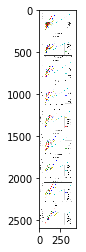

In [95]:
# %matplotlib inline

plt.imshow(im_v)